# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from jupyter_dash import JupyterDash
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

# Dash imports
from dash import dcc, html
from dash.dependencies import Input, Output


# EDA

# reading the file

In [2]:
data = pd.read_csv("Amazon Sale Report.csv")

# converting to dataframe

In [3]:
df= pd.DataFrame(data)
df.set_index('Order ID', inplace=True)
df.head(10)

,index,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
Order ID,,,,,,,,,,,,,,,,,,,,,
405-8078784-5731545,0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
171-9198151-1101146,1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
404-0687676-7273146,2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
403-9615377-8133951,3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
407-1069790-7240320,4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
404-1490984-4578765,5,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
408-5748499-6859555,6,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
406-7807733-3785945,7,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
407-5443024-5233168,8,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


# Dataset shape 

In [4]:
df.shape

(128975, 23)

# checking nulls

In [5]:
df.isnull().sum()

index                     0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

There are 2 columns that have too much nulls and unnamed column that need to be removed. In courier status columns nulls mean the order is cancelled

## checking if currency, amount or courier status is null when the order is cancelled 

In [6]:
filtered_df = df[df['Status'] == 'Cancelled']
select = filtered_df[['Courier Status', 'Amount', 'currency', 'Status']]
select.head(5)

,Courier Status,Amount,currency,Status
Order ID,,,,
405-8078784-5731545,NaN,647.62,INR,Cancelled
403-9615377-8133951,NaN,753.33,INR,Cancelled
407-5443024-5233168,Cancelled,NaN,NaN,Cancelled
404-6019946-2909948,NaN,570.48,INR,Cancelled
404-5933402-8801952,NaN,NaN,NaN,Cancelled


After investigation, it was noticed that the 'Courier', 'Amount', and 'Currency' fields are null when the order is marked as 'Cancelled'. 

# describing the dataset 

In [7]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# columns data types 

In [8]:
df.dtypes

index                   int64
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

date, index and ship_postal_code coulmns type need to changed 

# checking for duplicates

In [9]:
print(df.duplicated().sum())

0


# Data processing


## removing columns that contain too much nulls 

In [10]:
df.drop(columns= ["Unnamed: 22", "fulfilled-by", "promotion-ids"], inplace= True)

## filling columns that has nulls

In [11]:
df['Courier Status'].fillna("Cancelled", inplace= True)
df['Amount'].fillna(0, inplace = True)

## detecting outliers 

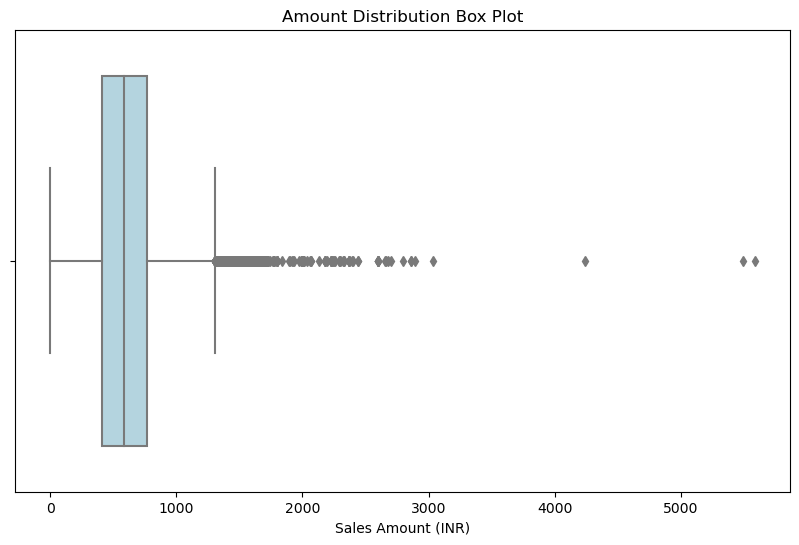

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=df, color='lightblue')
plt.title('Amount Distribution Box Plot')
plt.xlabel('Sales Amount (INR)')
plt.show()

there is outliers in 'Amount' column so we need to remove it 

In [13]:
lower_threshold = df['Amount'].quantile(0.01)
upper_threshold = df['Amount'].quantile(0.09)
df_no_outliers = df[(df['Amount'] >= lower_threshold) & (df['Amount'] <= upper_threshold)]
df_no_outliers.shape


(11831, 20)

## changing data types 

In [14]:
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Date'])
df_no_outliers['index'] = df_no_outliers['index'].astype(str)
df_no_outliers['ship-postal-code'] = df_no_outliers['ship-postal-code'].astype(str)

# visualization 

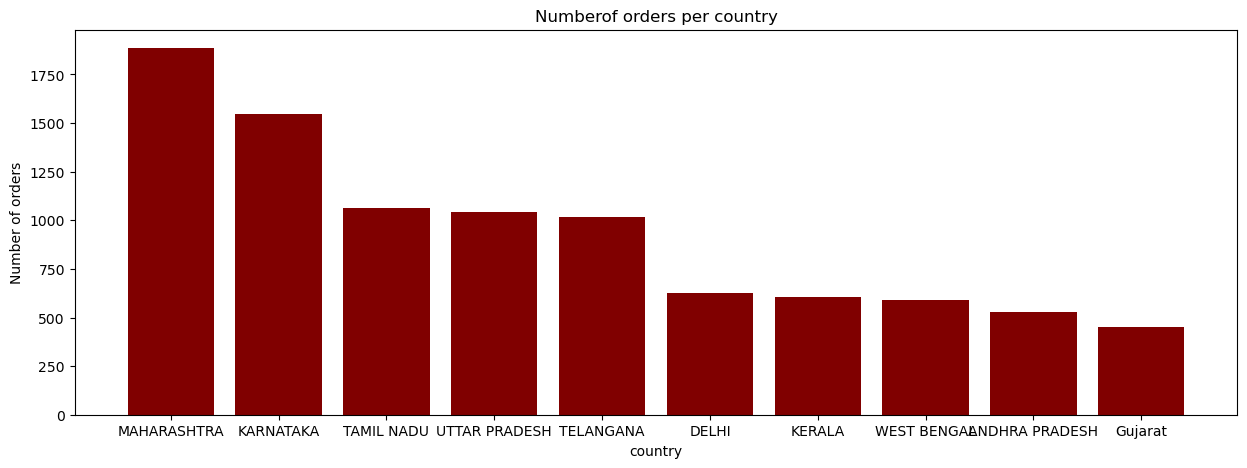

In [15]:
fig = plt.figure(figsize = (15, 5))

country_counts = df_no_outliers['ship-state'].value_counts().head(10)

plt.bar(country_counts.index, country_counts.values, color='maroon')

plt.xlabel("country")
plt.ylabel("Number of orders")
plt.title("Numberof orders per country")
plt.show()

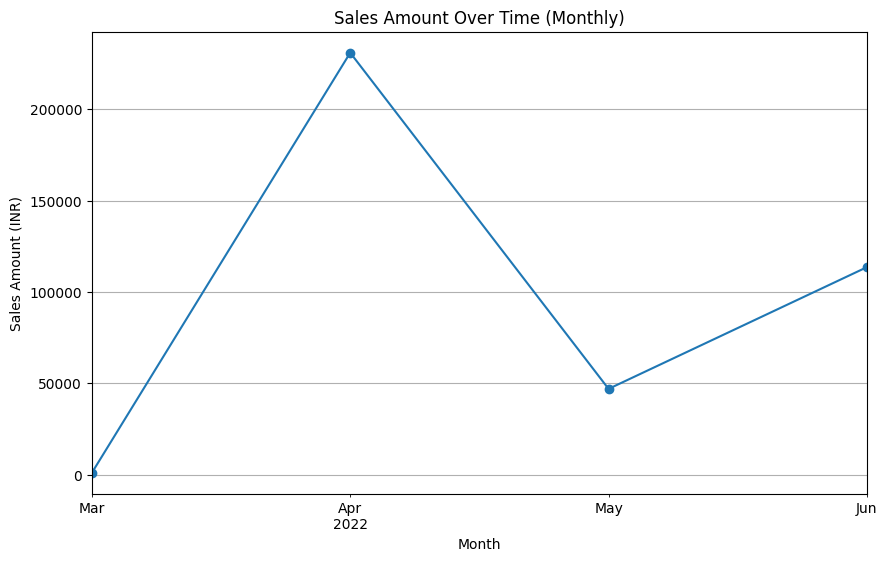

In [17]:
shipped_df = df_no_outliers[df_no_outliers['Status'].str.contains('Shipped')]

monthly_sales = shipped_df.groupby(shipped_df['Date'].dt.to_period('M'))['Amount'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Sales Amount Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Sales Amount (INR)')
plt.grid(True)
plt.show()

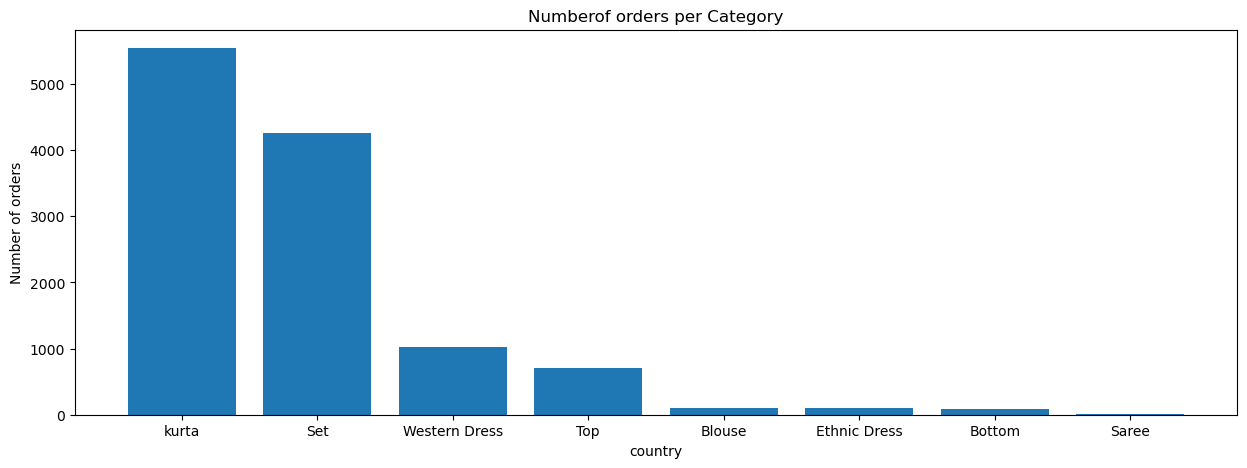

In [17]:
fig = plt.figure(figsize = (15, 5))

category_counts = df_no_outliers['Category'].value_counts().head(10)

plt.bar(category_counts.index, category_counts.values)

plt.xlabel("country")
plt.ylabel("Number of orders")
plt.title("Numberof orders per Category")
plt.show()

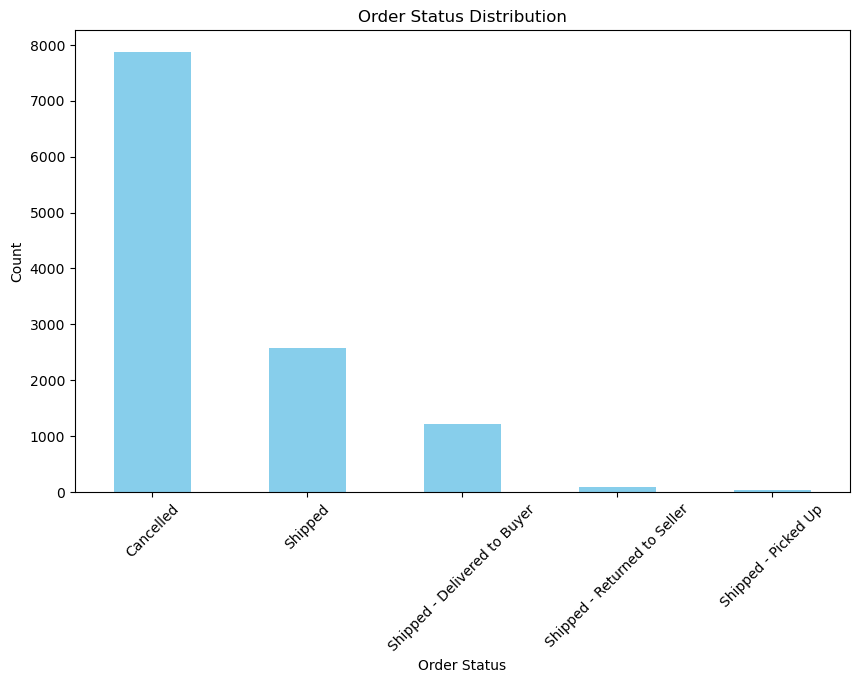

In [18]:
status_counts = df_no_outliers['Status'].value_counts().head()

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


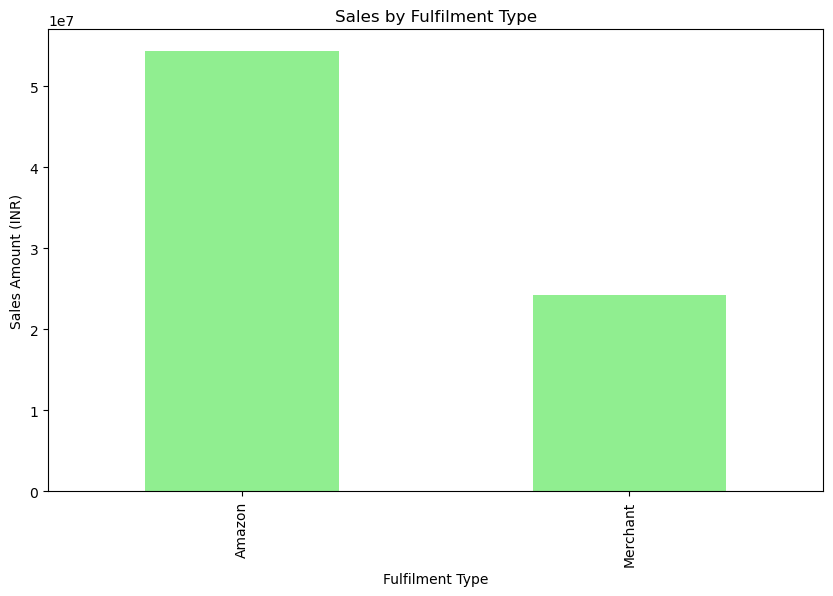

In [19]:
fulfilment_sales = df.groupby('Fulfilment')['Amount'].sum()

plt.figure(figsize=(10, 6))
fulfilment_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Fulfilment Type')
plt.xlabel('Fulfilment Type')
plt.ylabel('Sales Amount (INR)')
plt.show()


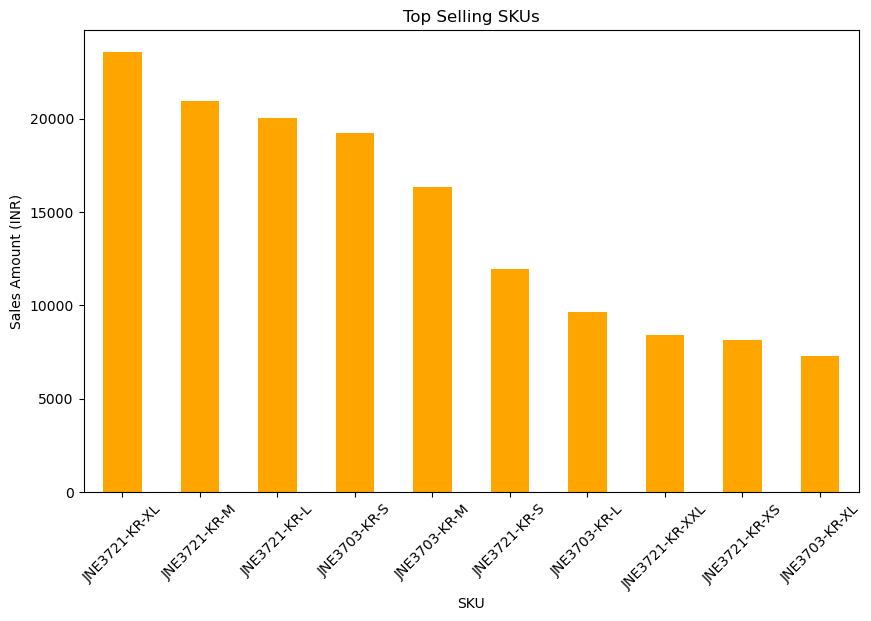

In [20]:
sku_sales = df_no_outliers.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sku_sales.plot(kind='bar', color='orange')
plt.title('Top Selling SKUs')
plt.xlabel('SKU')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45)
plt.show()


In [19]:
df['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

Simplified_Status
0    7869
2    3928
1      34
Name: count, dtype: int64


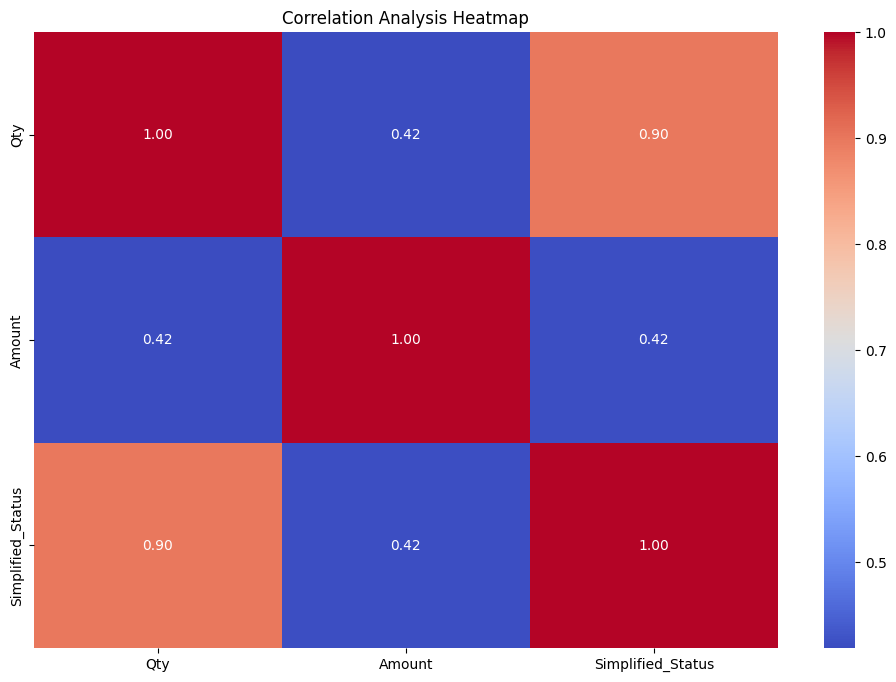

In [16]:

from sklearn.preprocessing import LabelEncoder

# Mapping to simplify status categories
status_mapping = {
    'Shipped': 'Shipped',
    'Shipped - Delivered to Buyer': 'Shipped',
    'Shipped - Returned to Seller': 'Shipped',
    'Shipped - Picked Up': 'Shipped',
    'Shipped - Returning to Seller': 'Shipped',
    'Shipped - Out for Delivery': 'Shipped',
    'Shipped - Rejected by Buyer': 'Shipped',
    'Shipping': 'Shipped',
    'Shipped - Lost in Transit': 'Shipped',
    'Shipped - Damaged': 'Shipped',
    'Pending': 'Pending',
    'Pending - Waiting for Pick Up': 'Pending',
    'Cancelled': 'Cancelled'
}

# Apply mapping
df_no_outliers['Simplified_Status'] = df_no_outliers['Status'].map(status_mapping).fillna('Other')

# Encode 'Simplified_Status' to numerical values
label_encoder = LabelEncoder()
df_no_outliers['Simplified_Status'] = label_encoder.fit_transform(df_no_outliers['Simplified_Status'])

# Check the new value counts
print(df_no_outliers['Simplified_Status'].value_counts())

# Calculate correlation matrix with the new simplified status
correlation_matrix = df_no_outliers.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis Heatmap')
plt.show()



# prediction model

In [18]:
X = df_no_outliers.drop(columns=['Date', 'Status', 'Simplified_Status'])  
y = df_no_outliers['Simplified_Status']

X = pd.get_dummies(X, drop_first=True)

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, multi_class='multinomial')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'{name} Model:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('-' * 60)


Logistic Regression Model:
Accuracy: 0.9362061681453316
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1568
           1       0.00      0.00      0.00         6
           2       0.93      0.88      0.90       793

    accuracy                           0.94      2367
   macro avg       0.62      0.62      0.62      2367
weighted avg       0.93      0.94      0.93      2367

------------------------------------------------------------


# Dashboard

In [34]:
cancelled_orders = df_no_outliers[df_no_outliers['Status'] == 'Cancelled']

# Aggregate by state to count cancelled orders
cancelled_orders_count = cancelled_orders.groupby('ship-state').size().reset_index(name='Cancelled Orders')

# Determine state with the highest cancelled orders
state_highest_cancelled = cancelled_orders_count.loc[cancelled_orders_count['Cancelled Orders'].idxmax(), 'ship-state']

# Interactive Bar Chart with plotly
fig = px.bar(cancelled_orders_count, x='ship-state', y='Cancelled Orders', 
             title='Cancelled Orders by state',
             labels={'Cancelled Orders': 'Number of Cancelled Orders', 'ship-state': 'ship-state'},
             text='Cancelled Orders',
             hover_data={'Cancelled Orders': True, 'ship-state': True},
             color_discrete_sequence=['#636EFA'])

# Add annotations
fig.update_layout(annotations=[dict(text=f"Highest Cancelled Orders: {state_highest_cancelled}", 
                                    x=0.5, y=1.15, 
                                    font=dict(size=14),
                                    showarrow=False, 
                                    xanchor='center', 
                                    yanchor='top')])

# Display interactive chart
fig.show()

# Optionally add interactive widgets for filtering
# Example dropdown to filter by state
state_dropdown = widgets.Dropdown(
    options=list(cancelled_orders_count['ship-state']),
    value=state_highest_cancelled,
    description='Select state:',
    disabled=False,
)
def update_chart(state):
    filtered_data = cancelled_orders_count[cancelled_orders_count['ship-state'] == state]
    fig = px.bar(filtered_data, x='ship-state', y='Cancelled Orders',
                 title=f'Cancelled Orders for {state}',
                 labels={'Cancelled Orders': 'Number of Cancelled Orders', 'ship-state': 'ship-state'},
                 text='Cancelled Orders',
                 hover_data={'Cancelled Orders': True, 'ship-state': True},
                 color_discrete_sequence=['#636EFA'])
    fig.show()

widgets.interactive(update_chart, state=state_dropdown)

interactive(children=(Dropdown(description='Select state:', index=22, options=('ANDAMAN & NICOBAR ', 'ANDHRA P…

In [44]:
cancelled_orders = df_no_outliers[df_no_outliers['Status'] == 'Cancelled']

# Aggregate by product to count cancelled orders
cancelled_orders_count = cancelled_orders.groupby('SKU').size().reset_index(name='Cancelled Orders')

# Determine product with the most cancelled orders
product_most_cancelled = cancelled_orders_count.loc[cancelled_orders_count['Cancelled Orders'].idxmax(), 'SKU']

# Interactive Bar Chart with plotly
fig = px.bar(cancelled_orders_count, x='SKU', y='Cancelled Orders', 
             title='Cancelled Orders by Product',
             labels={'Cancelled Orders': 'Number of Cancelled Orders', 'SKU': 'SKU'},
             text='Cancelled Orders',
             hover_data={'Cancelled Orders': True, 'SKU': True},
             color_discrete_sequence=['#636EFA'])

# Add annotations
fig.update_layout(annotations=[dict(text=f"Most Cancelled Product: {product_most_cancelled}", 
                                    x=0.5, y=1.15, 
                                    font=dict(size=14),
                                    showarrow=False, 
                                    xanchor='center', 
                                    yanchor='top')])

# Display interactive chart
fig.show()

# Optionally add interactive widgets for filtering
# Example dropdown to filter by product
product_dropdown = widgets.Dropdown(
    options=list(cancelled_orders_count['SKU']),
    value=product_most_cancelled,
    description='Select Product:',
    disabled=False,
)
def update_chart(product):
    filtered_data = cancelled_orders_count[cancelled_orders_count['SKU'] == product]
    fig = px.bar(filtered_data, x='SKU', y='Cancelled Orders',
                 title=f'Cancelled Orders for {product}',
                 labels={'Cancelled Orders': 'Number of Cancelled Orders', 'SKU': 'SKU'},
                 text='Cancelled Orders',
                 hover_data={'Cancelled Orders': True, 'SKU': True},
                 color_discrete_sequence=['#1F77B8'])
    fig.show()

widgets.interactive(update_chart, product=product_dropdown)

interactive(children=(Dropdown(description='Select Product:', index=1758, options=('AN205-YELLOW-S', 'AN208-MU…

In [42]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

# Initialize the JupyterDash app
app = JupyterDash(__name__)

# Get unique categories for the dropdown options
unique_categories = df['Category'].unique()
dropdown_options = [{'label': category, 'value': category} for category in unique_categories]

# Define the layout of the app
app.layout = html.Div([
    html.H1("Amazon Sale Report Dashboard"),
    
    # Dropdown for selecting category
    dcc.Dropdown(
        id='category-dropdown',
        options=dropdown_options,
        value=[unique_categories[0]],  # default value as a list
        multi=True
    ),
    
    # Graphs
    dcc.Graph(id='sales-over-time'),
    dcc.Graph(id='category-breakdown'),
    dcc.Graph(id='top-products')
])

# Define the callback to update the graphs
@app.callback(
    [Output('sales-over-time', 'figure'),
     Output('category-breakdown', 'figure'),
     Output('top-products', 'figure')],
    [Input('category-dropdown', 'value')]
)
def update_graphs(selected_categories):
    if not selected_categories:
        selected_categories = [unique_categories[0]]  # default to the first category if none selected
    
    filtered_df = df[df['Category'].isin(selected_categories)]
    
    # Sales over time
    sales_over_time = filtered_df.groupby('Date').agg({'Amount': 'sum'}).reset_index()
    fig1 = px.line(sales_over_time, x='Date', y='Amount', title='Sales Over Time')
    
    # Category breakdown
    category_breakdown = filtered_df.groupby('Category').agg({'Amount': 'sum'}).reset_index()
    fig2 = px.pie(category_breakdown, values='Amount', names='Category', title='Sales by Category')
    
    # Top products
    top_products = filtered_df.groupby('SKU').agg({'Qty': 'sum'}).reset_index().sort_values(by='Qty', ascending=False).head(10)
    fig3 = px.bar(top_products, x='SKU', y='Qty', title='Top 10 Products by Quantity Sold')
    
    return fig1, fig2, fig3

# Run the app in Jupyter notebook
app.run_server(mode='inline')


Dash is running on http://127.0.0.1:8050/



## saving the dataset

In [15]:
# Save the DataFrame as a CSV file
df.to_csv('updated_df.csv', index=False)

print("DataFrame saved as updated_df.csv")

DataFrame saved as updated_df.csv
